In [7]:
import requests
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import logging


In [8]:
#Define Variables

api_key = '28f960e7da1f4ef2b960e7da1f4ef243' #API Key from Weather Underground Personal Weather Station(PWS)
resp_date_df = pd.DataFrame() #initialize dataframe to be inserted in db_table

#Column names for pandas data frame
column_names = ['Station_ID','Timezone','Timestamp_UTC', 'Timestamp_Local', 'epoch', 'Lat', 'Lon', 'solarRadiationHigh','uvHigh', 'WindDir_Avg', 'Humidity_High','Humidity_Low','Humidity_Avg','qcStatus', 'Temp_High','Temp_Low','Temp_Avg','WindSpeed_High','WindSpeed_Low','WindSpeed_Avg','WindGust_High','WindGust_Low','WindGust_Avg','DewPt_High','DewPt_Low','DewPt_Avg','WindChill_High','WindChill_Low','WindChill_Avg','HeatIndex_High','HeatIndex_Low','HeatIndex_Avg','Pressure_Max','Pressure_Min', 'PressureTrend','PrecipRate','PrecipTotal']


In [9]:
#Create and configure logger

logging.basicConfig(level = logging.DEBUG, filename='C:/Users/okiem/appendPWS.log', filemode='a', format='%(asctime)s - %(levelname)s - %(message)s')

In [10]:
#Perform GET request on WeatherUnderground API from key for historical date

date = 20200603  #Enter date to pull data YYYYMMDD
url_date = f'https://api.weather.com/v2/pws/history/hourly?stationId=KOKEDMON233&format=json&units=e&numericPrecision=decimal&date={date}&apiKey={api_key}'
#url_date = f'https://api.weather.com/v2/pws/observations/all/1day?stationId=KOKEDMON233&format=json&units=e&numericPrecision=decimal&apiKey={api_key}'

#Make the GET request from API
resp_date = requests.get(url_date) #Perform GET request
logging.info(f'url_date GET request status code: {resp_date.status_code}') #log the response status code

In [11]:
#Create raw Pandas DataFrame from WeatherUnderground API from key for historical date
resp_date_json = resp_date.json() #Create JSON object from API GET response
resp_date_df = pd.json_normalize(resp_date_json, 'observations') #Fill DataFrame with converted JSON data
resp_date_df.columns = column_names #Assign column names to dataframe

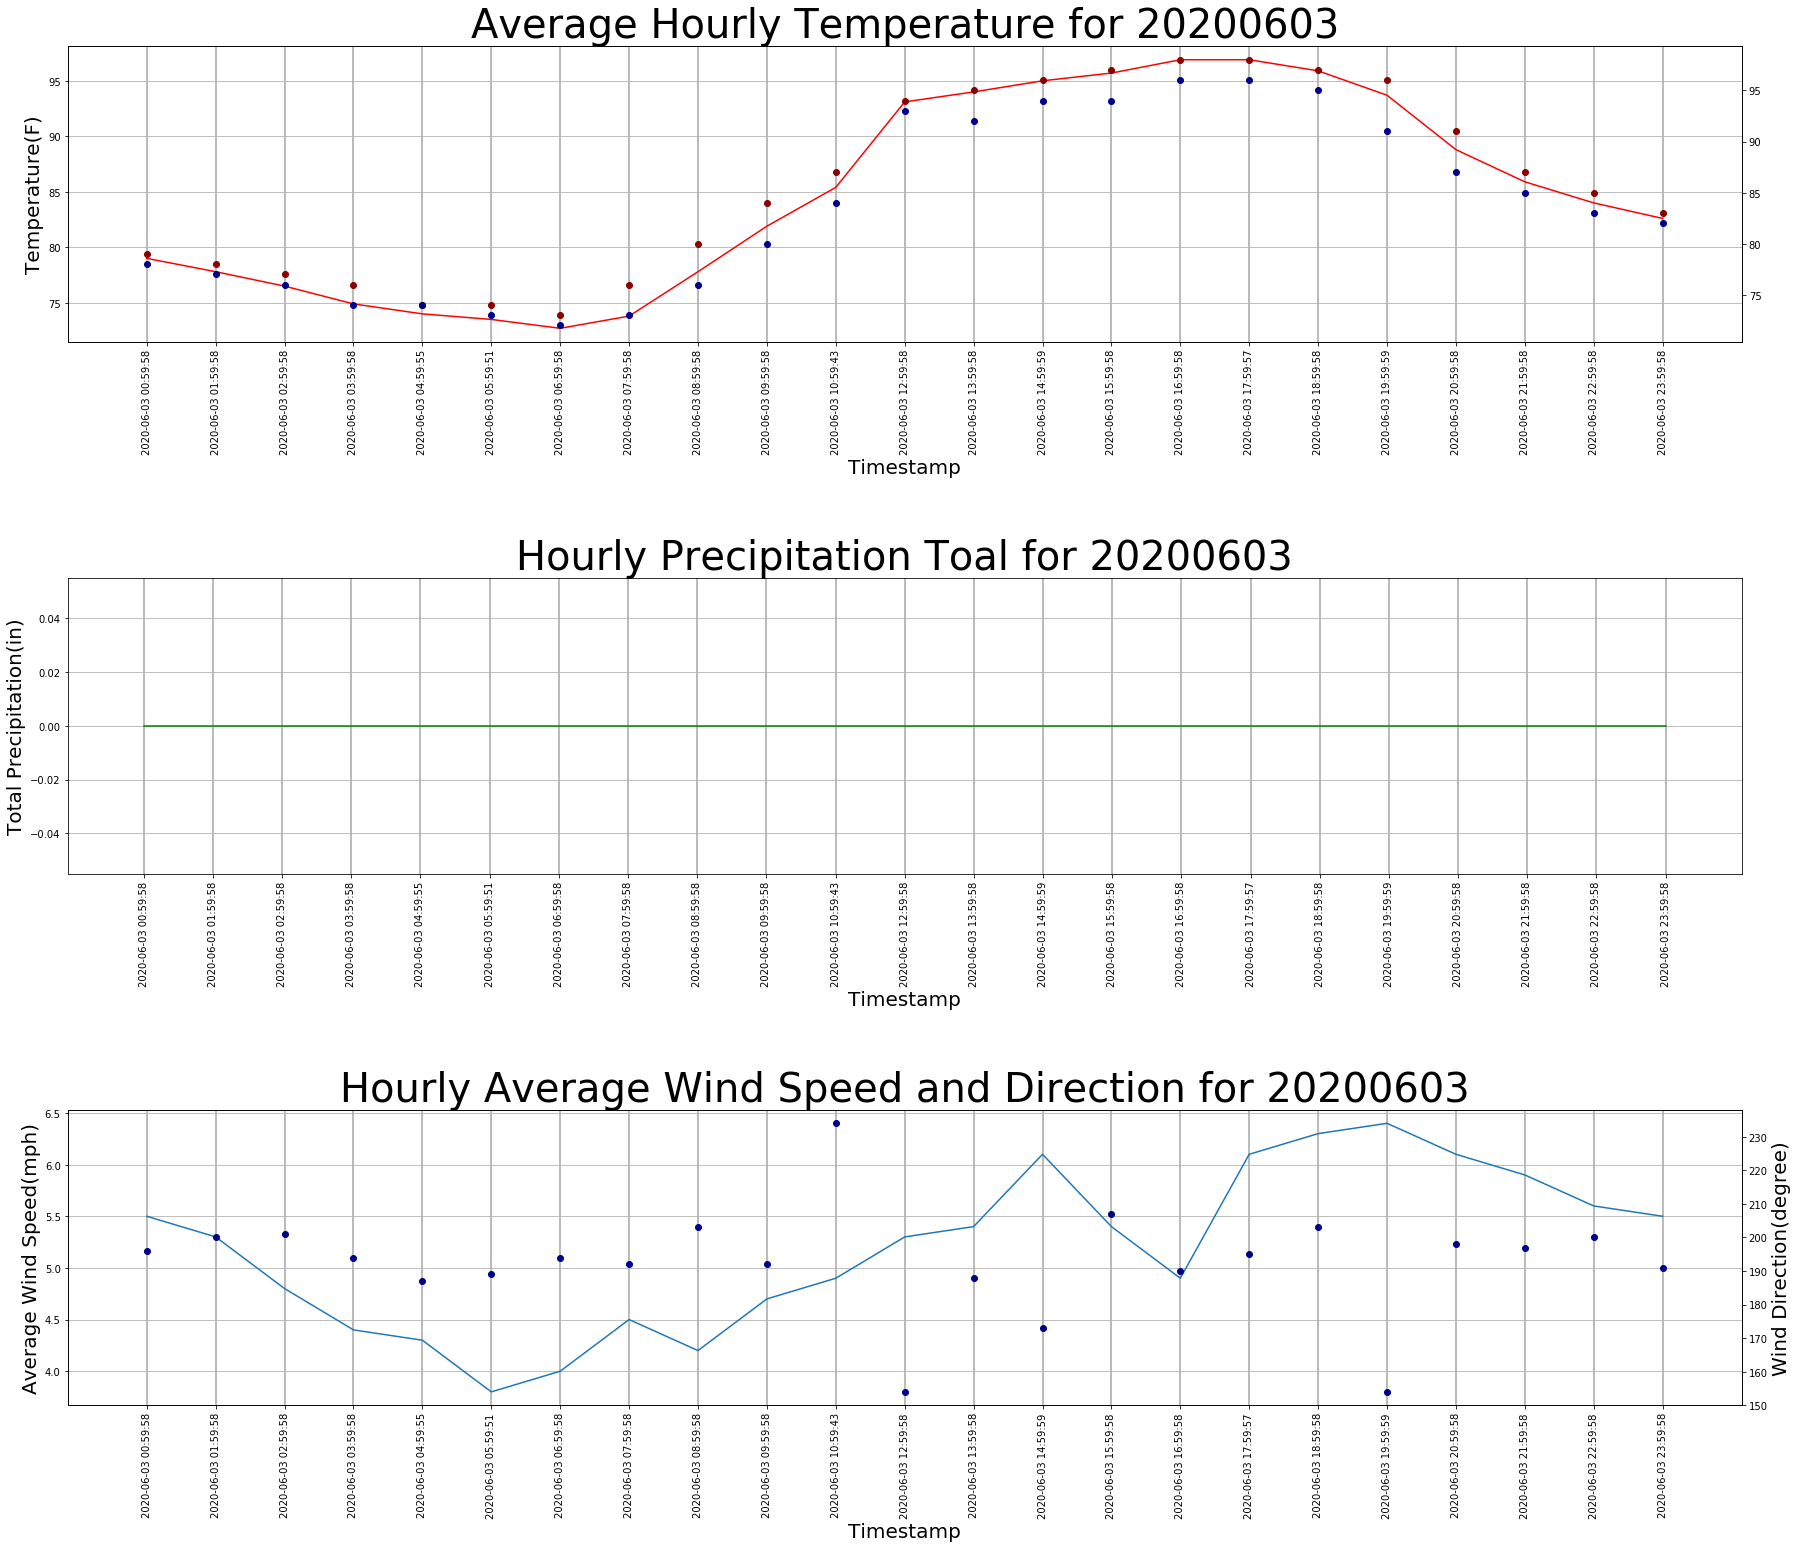

In [12]:
#Plots
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=.8)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot( resp_date_df['Timestamp_Local'],resp_date_df['Temp_Avg'], color='red')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
ax1.set_xlabel('Timestamp', fontsize=20)
ax1.set_ylabel('Temperature(F)',fontsize=20)
ax1.set_title(f'Average Hourly Temperature for {date}', fontsize=40)
ax1.xaxis.grid(linewidth=1.7)
ax1.yaxis.grid()
ax5 = ax1.twinx()
ax5.scatter(resp_date_df['Timestamp_Local'], resp_date_df['Temp_High'], color='darkred')
ax5.scatter(resp_date_df['Timestamp_Local'], resp_date_df['Temp_Low'], color='darkblue')


ax2.plot( resp_date_df['Timestamp_Local'],resp_date_df['PrecipTotal'], color='green')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
ax2.set_xlabel('Timestamp',fontsize=20)
ax2.set_ylabel('Total Precipitation(in)',fontsize=20)
ax2.set_title(f'Hourly Precipitation Toal for {date}', fontsize=40)
ax2.xaxis.grid(linewidth=1.7)
ax2.yaxis.grid()


ax3.plot( resp_date_df['Timestamp_Local'],resp_date_df['WindSpeed_Avg'])
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90)
ax3.set_xlabel('Timestamp',fontsize=20)
ax3.set_ylabel('Average Wind Speed(mph)',fontsize=20)
ax3.set_title(f'Hourly Average Wind Speed and Direction for {date}', fontsize=40)
ax3.xaxis.grid(linewidth=1.7)
ax3.yaxis.grid()
ax4 = ax3.twinx()
ax4.scatter(resp_date_df['Timestamp_Local'], resp_date_df['WindDir_Avg'], color='darkblue')
ax4.set_ylabel('Wind Direction(degree)',fontsize=20)

plt.show()


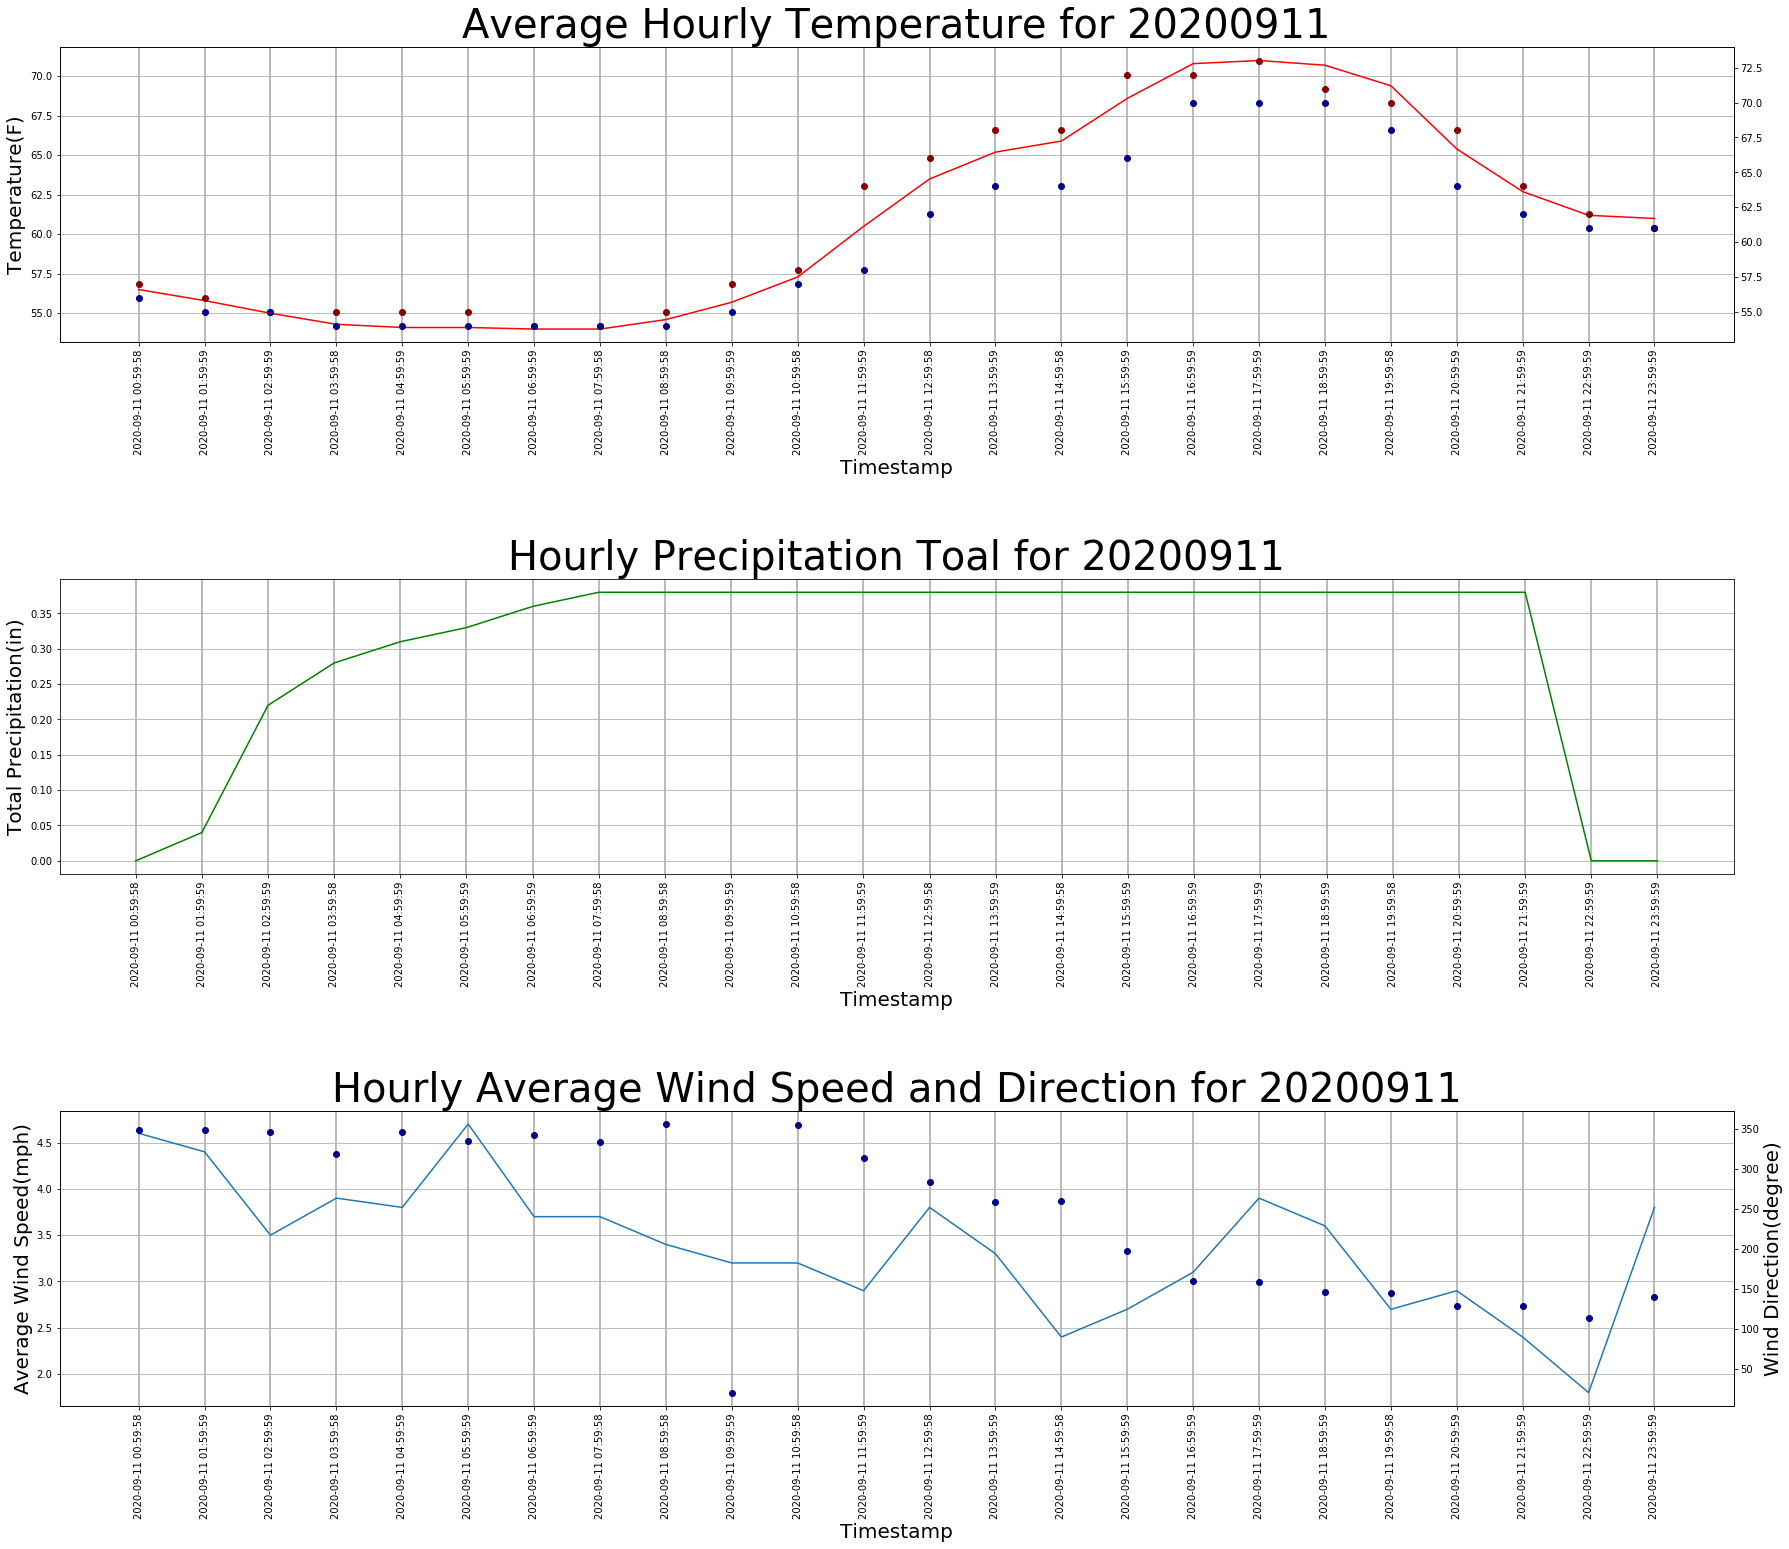